# **Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **Data Collection & Processing**


In [ ]:
# load the data from csv file to pandas dataframe
titanic_data=pd.read_csv('/content/train.csv')

In [ ]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# drop the 'Cabin' column from the dataframe
titanic_data = titanic_data.drop(columns= ['Cabin'],axis=1)

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace= True)

In [ ]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace= True)

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **Data Analysis**

In [ ]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# finding the no. of people survived and not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# **Data Visualization**

In [ ]:
sns.set()

### We do this only for numeric discrete data and for string categorical data

*   **For Survived**





In [ ]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

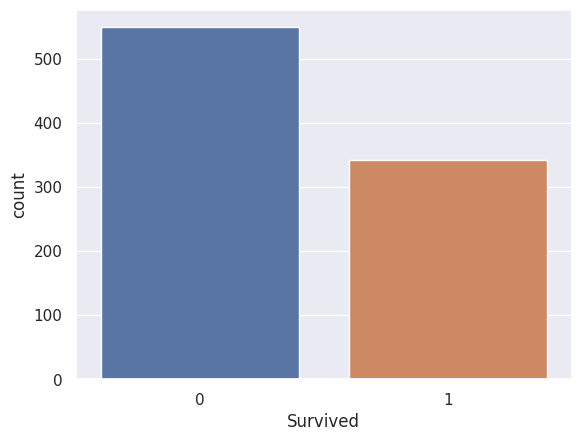

In [ ]:
# making a count plot for "Survived" column
sns.countplot(x= 'Survived', data=titanic_data)

*   **For Sex**





In [ ]:
# finding the no. of male & female
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

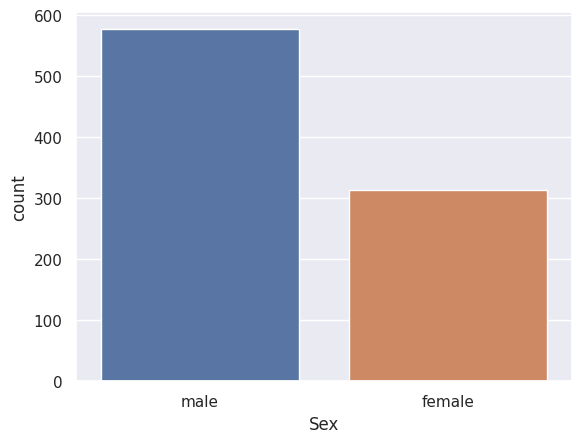

In [ ]:
# making a count plot for "Sex" column
sns.countplot(x= 'Sex', data= titanic_data)

*   **For Survivors gender wise**





<Axes: xlabel='Sex', ylabel='count'>

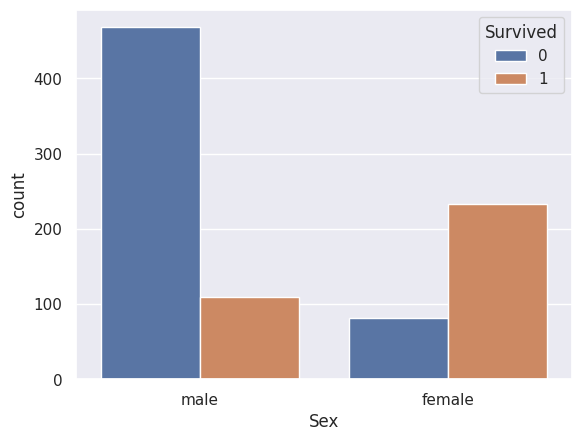

In [ ]:
# no. of survivors gender wise
sns.countplot(x= 'Sex', hue='Survived', data= titanic_data)

*   **For Pclass**





In [ ]:
# finding the no. of Upper, middle and lower class
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

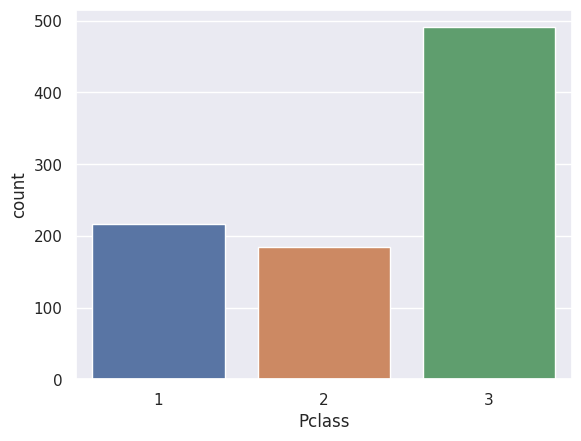

In [ ]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data= titanic_data)

*   **For Survivors Pclass wise**

<Axes: xlabel='Pclass', ylabel='count'>

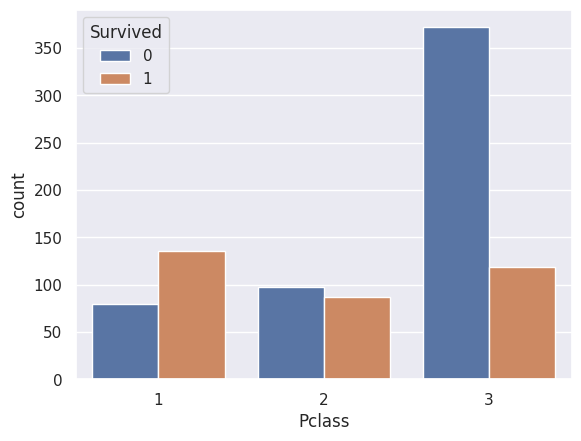

In [ ]:
# no. of survivors Pclass wise
sns.countplot(x='Pclass', hue='Survived', data= titanic_data)

*   **For SibSp**

In [ ]:
# finding the no. of brother, sister, stepbrother, stepsister and husband, wife (mistresses and fiancés were ignored)
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

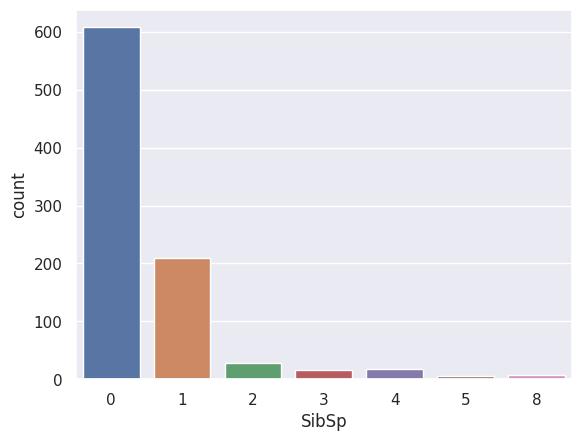

In [ ]:
# making a clount plot for 'SibSp' column
sns.countplot(x= 'SibSp', data= titanic_data)

*   **For Survivors SibSp wise**

<Axes: xlabel='SibSp', ylabel='count'>

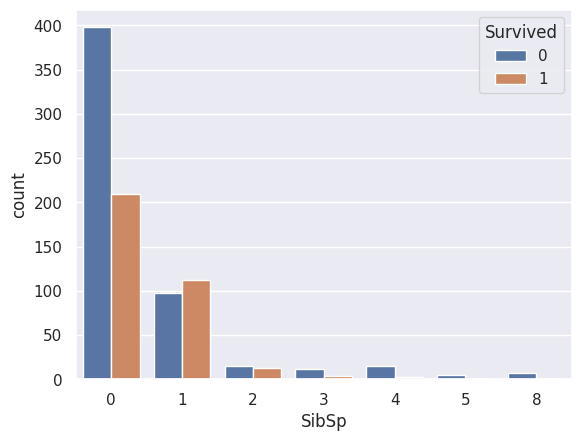

In [ ]:
# no. of survivors 'SibSp' wise
sns.countplot(x= 'SibSp', hue= 'Survived', data= titanic_data)

*   **For Parch**

In [ ]:
# finding the no. of mother, father and daughter, son, stepdaughter, stepson  Some children travelled only with a nanny, therefore parch=0 for them.
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

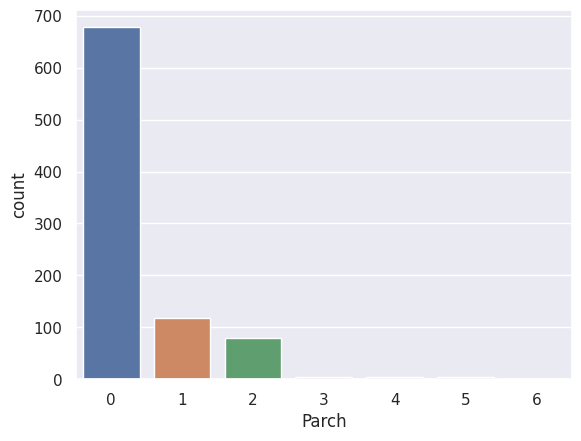

In [ ]:
# making a count plot for 'Parch' column
sns.countplot(x='Parch', data=titanic_data)

*   **For Survivors Parch wise**

<Axes: xlabel='Parch', ylabel='count'>

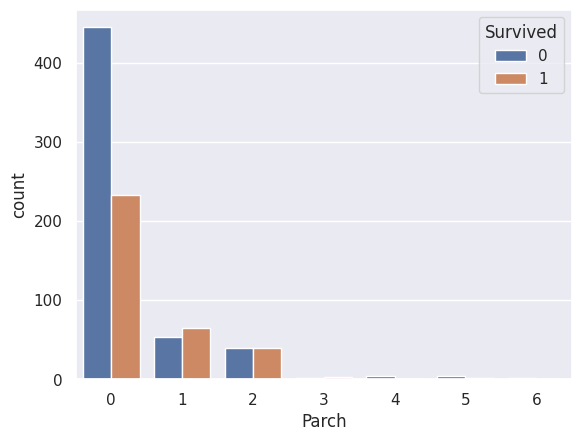

In [ ]:
# no. of Survivors 'Parch' wise
sns.countplot(x='Parch', hue= 'Survived', data= titanic_data)

*   **For Embarked**

In [ ]:
# finding the no. of
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# **Encoding the categorical columns**

In [ ]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# converting the categorical columns
titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S': 0, 'C':1, 'Q':2}}, inplace= True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# **Separating Features & Target**

In [ ]:
X= titanic_data.drop(columns= ['PassengerId','Survived', 'Name', 'Ticket'])
Y= titanic_data['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# **Splitting the data into training data and testing data**

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


# **Model Training**

### **Logistic Regression** is statiscal model & it is useful for binary classification problem

In [ ]:
model= LogisticRegression()

In [ ]:
# training the logistic regression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

# **Model Evaluation**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# create a function with many machine learning models
def models(X_train, Y_train):

  # Use Logistic Regression
  from sklearn.linear_model import LogisticRegression
  model= LogisticRegression(random_state=2)
  model.fit(X_train, Y_train)

  # Use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
  knn.fit(X_train, Y_train)

  #USe SVC (linear model)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel='linear', random_state=2)
  svc_lin.fit(X_train, Y_train)

  #USe SVC (RBF kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel='rbf', random_state=2)
  svc_rbf.fit(X_train, Y_train)

  #Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss =  GaussianNB()
  gauss.fit(X_train, Y_train)

  #Use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=2)
  tree.fit(X_train, Y_train)

  #Use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=2)
  forest.fit(X_train, Y_train)

  #Use XGBoost Classifier
  import xgboost as xgb
  xgb_classifier = xgb.XGBClassifier()
  xgb_classifier.fit(X_train,Y_train)

  #Print the training accuracy for each model
  print('[0]Logistic Regression Training Accuracy: ', model.score(X_train, Y_train))
  print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
  print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
  print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
  print('[7]XGBoost Classifier Training Accuracy: ', xgb_classifier.score(X_train, Y_train))

  return model, knn, svc_lin, svc_rbf, gauss, tree, forest, xgb_classifier

In [ ]:
#Get and train all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.8089887640449438
[1]K Neighbors Training Accuracy:  0.8637640449438202
[2]SVC Linear Training Accuracy:  0.800561797752809
[3]SVC RBF Training Accuracy:  0.8567415730337079
[4]Gaussian NB Training Accuracy:  0.7935393258426966
[5]Decision Tree Training Accuracy:  0.9859550561797753
[6]Random Forest Training Accuracy:  0.9691011235955056
[7]XGBoost Classifier Training Accuracy:  0.973314606741573


In [ ]:
#Show the confusion matrix and accuracy for all of the models of the models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #Extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP + TN)/(TP + TN + FN + FP)

  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
  print()

[[88 12]
 [28 51]]
Model[0] Testing Accuracy = "0.776536312849162"

[[94  6]
 [35 44]]
Model[1] Testing Accuracy = "0.770949720670391"

[[89 11]
 [31 48]]
Model[2] Testing Accuracy = "0.7653631284916201"

[[94  6]
 [34 45]]
Model[3] Testing Accuracy = "0.776536312849162"

[[86 14]
 [29 50]]
Model[4] Testing Accuracy = "0.7597765363128491"

[[88 12]
 [29 50]]
Model[5] Testing Accuracy = "0.770949720670391"

[[92  8]
 [28 51]]
Model[6] Testing Accuracy = "0.7988826815642458"

[[91  9]
 [29 50]]
Model[7] Testing Accuracy = "0.7877094972067039"



In [ ]:
#Get feature importance
forest = model[6]
importances = pd.DataFrame({'feature': titanic_data.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
SibSp,0.298
Name,0.287
Pclass,0.208
Sex,0.059
Survived,0.057
Age,0.049
Parch,0.043


<Axes: xlabel='feature'>

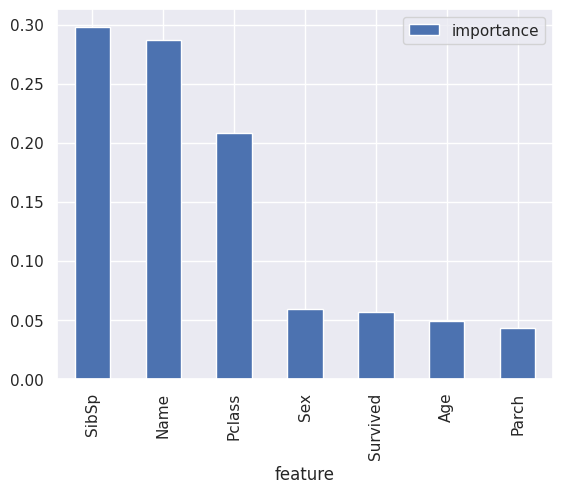

In [ ]:
#visulalize the importance
importances.plot.bar()

In [ ]:
#print the prediction of the random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

#Print the actual values
print(Y_test)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1
 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0]

707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: Survived, Length: 179, dtype: int64


In [ ]:
'''
SibSp	0.298
Name	0.287
Pclass	0.208
Sex	0.059
Survived	0.057
Age	0.049
Parch	0.043
'''
# My survival
my_survival = [[0, 21, 1, 0, 1, 21, 1]]

# Scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

# Print prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('Oh no! You did not make it.')
else:
  print('Nice! You survived!')


[0]
Oh no! You did not make it.
